# Time Series analysis with Statsmodels library

Statsmodel library is a very well known python library for statistical modelling.

The **tsa** sub package is what we will be using for time series analysis.

For installation: *pip install statsmodels* 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
data = pd.read_csv("./macrodata.csv", index_col=0, parse_dates=True)

In [5]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


**Observations**

- It is a data with quarterly frequencies
- realgdp: real gdp of the country

<AxesSubplot:title={'center':'GDP of the country'}>

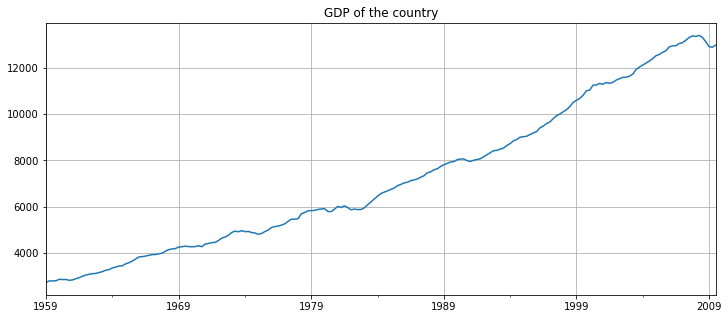

In [6]:
data['realgdp'].plot(figsize=(12,5), grid=True, title='GDP of the country')

## The application of H-P filter

The *H-P filter* [(Hodrick-Prescott) filter](https://en.wikipedia.org/wiki/Hodrick%E2%80%93Prescott_filter) decomposes the time series into trend and cyclical components.

$$ y_t = \tau_t + c_t $$

Where $\tau_t$ is the trend component and $c_t$ is the cyclical component.

This H-P filter has one hyperparameter lambda ($\lambda$): The Hodrick-Prescott smoothing parameter. 

A value of 1600 is suggested for quarterly data. A value of 6.25 ($1600/4^4$) for annual data and 129600 ($1600*3^4$) for monthly
    data.

$\lambda = 1600$ for quarterly data

In [7]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [8]:
gdp_cycle, gdp_trend = hpfilter(data['realgdp'], lamb=1600)  # this is a quarterly data

In [9]:
data['gdp_trend'] = gdp_trend

data['gdp_cycle'] = gdp_cycle

<IPython.core.display.Javascript object>


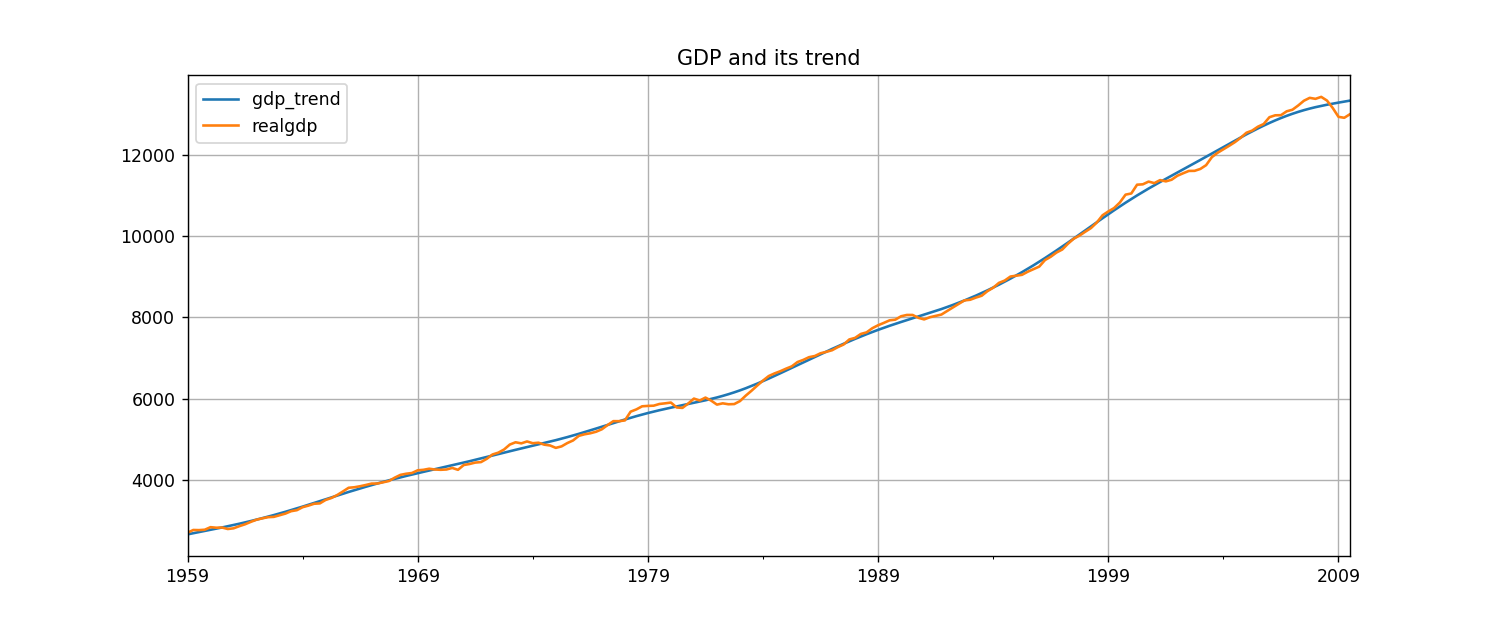

<AxesSubplot:title={'center':'GDP and its trend'}>

In [12]:
%matplotlib notebook

data[['gdp_trend', 'realgdp']].plot(figsize=(12,5), grid=True, title="GDP and its trend")